In this project we will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease.We will use different layer and other hyperparameters for building, training and testing this classification model.We will be using tensorflow and keras for this project.

In [1]:
# Load the drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# After executing the cell above,Drive
# files will be present in "/content/drive/My drive"
! ls "/content/drive/My Drive"

'10th marksheet1.pdf'	       'Colab Notebooks'
'10th Mark sheet (1).pdf'      'Contacts List.gsheet'
'10 th marksheet2.pdf'	       'Degree marksheet.pdf'
'10th Mark sheet.pdf'	       'edited_Resume_Ashish kumar mandal_Format1.pdf'
'12th marksheet.pdf'	       'Innomatics_Internship(Project).zip'
 1422031009.pdf		       'Pan Card12.pdf'
 20180408_111218.jpg	       'Passport size photo1.pdf'
 20190712162424.pdf	        Plant_images_pianalytix
'Aadhar card1.pdf'	       'Resume_Ashish kumar mandal_Format1.pdf'
'Adhar card.pdf'	       'Resume Checklist.docx'
'April  2019 salary slip.pdf'  'resume format.docx'
'Ashish Mandal.doc'	       'Tenants drain line  parameters 1.gsheet'
'Ashish resume.pdf'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

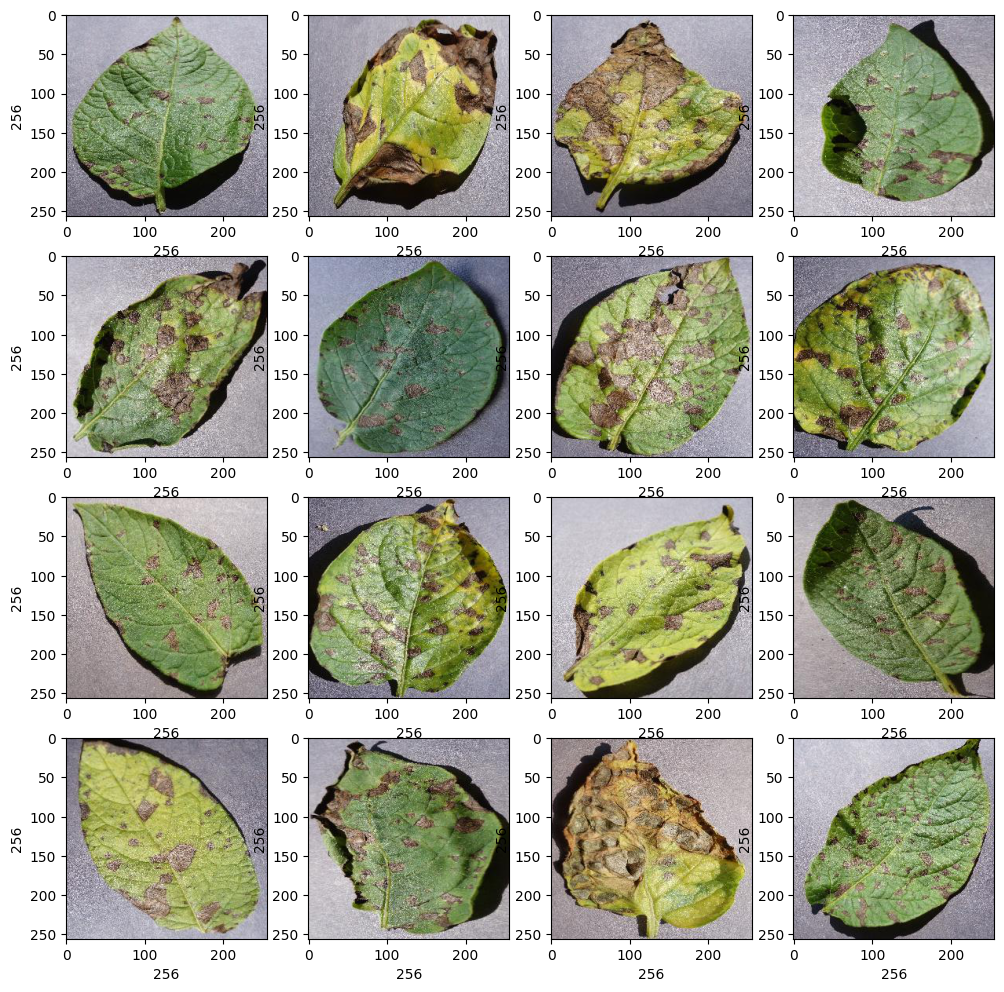

In [4]:
# plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  rand_img = imread(path + '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
  plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image


In [5]:
# Converting Image to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None :
      image  = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
        return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [6]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ["'Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot'"]
binary_labels = [0,1,2]
temp = -1

# Reading and Converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [9]:
image_list[0].shape

(256, 256, 3)

In [10]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,test_size = 0.2, random_state = 10)

In [12]:
x_train = np.array(x_train, dtype = np.float16) / 225.0
x_test = np.array(x_test, dtype = np.float16) / 225.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding="same", input_shape = (256,256,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [15]:
model.compile(loss="categorical_crossentropy", optimizer = Adam(0.0001), metrics=["accuracy"])

In [16]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [17]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train,batch_size = batch_size, epochs=epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 14s 608ms/step - loss: 1.0211 - accuracy: 0.5017 - val_loss: 0.7358 - val_accuracy: 0.9167
Epoch 2/50
5/5 [==============================] - 1s 229ms/step - loss: 0.6251 - accuracy: 0.7604 - val_loss: 0.4626 - val_accuracy: 0.9167
Epoch 3/50
5/5 [==============================] - 1s 220ms/step - loss: 0.4041 - accuracy: 0.9219 - val_loss: 0.3181 - val_accuracy: 0.9167
Epoch 4/50
5/5 [==============================] - 1s 164ms/step - loss: 0.2615 - accuracy: 0.9514 - val_loss: 0.2323 - val_accuracy: 0.9583
Epoch 5/50
5/5 [==============================] - 1s 157ms/step - loss: 0.1878 - accuracy: 0.9653 - val_loss: 0.1759 - val_accuracy: 0.9306
Epoch 6/50
5/5 [==============================] - 1s 161ms/step - loss: 0.1369 - accuracy: 0.9792 - val_loss: 0.1329 - val_accuracy: 0.9514
Epoch 7/50
5/5 [==============================] - 1s 162ms/step - loss: 0.1052 - accuracy: 0.9826 - val_loss: 0.1026 - val_accuracy: 0.9931
Epoch 8/50
5/5 [===

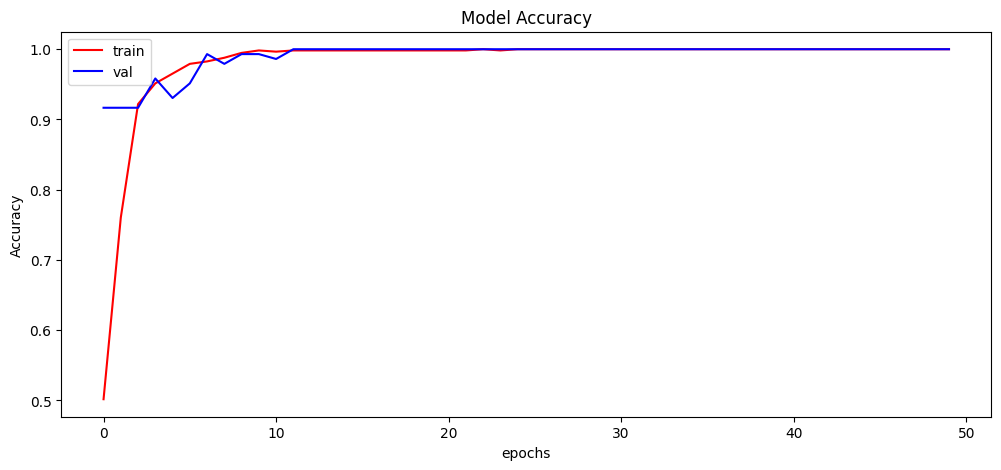

In [18]:
# plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history["accuracy"], color = "r")
plt.plot(history.history["val_accuracy"], color = "b")
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test,y_test)
print(f"Test Accuracy : {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 64ms/step - loss: 0.0605 - accuracy: 0.9889
Test Accuracy : 98.88888597488403


In [20]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 20ms/step


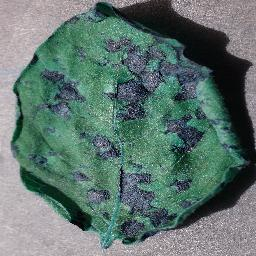

In [21]:
#plotting image to compare
img = array_to_img(x_test[10])
img

In [31]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

IndexError: ignored